In [1]:
import os
import cv2
import shutil
import math
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
class Image_Custom_Augmentation:

    def __init__(self, SP_intensity = False, RO_Key = False, Br_intensity = False, HV_Key = False, HE_Key = False):
        # Salt and Pepper Intensity
        self.SP_intensity = SP_intensity 
        # Brightness Intensity
        self.Br_intensity = Br_intensity 
        # Vertical/Horizontal Flip Key
        self.HV_Key = HV_Key 
        # Rotate Key
        self.RO_Key = RO_Key 
        # Histogram Equalization Key
        self.HE_Key = HE_Key 
        
        
    def Salt_n_Pepper(self, image_path, output_dir):
        image = cv2.imread(image_path)
        clean_label = os.path.splitext(os.path.basename(image_path))[0]
        # Create a Salt&Pepper filter
        height, width, _ = image.shape

        # Generate random noise mask
        salt_mask = np.random.rand(height, width) < self.SP_intensity
        pepper_mask = np.random.rand(height, width) < self.SP_intensity
        
        # Apply salt noise
        image[salt_mask] = [255,255,255]  # Set pixel to white (salt)
        image[pepper_mask] = [0,0,0]  # Set pixel to black (pepper)

        # Save the modified image to the output path
        custom_name = f"{clean_label}"+"_SP_"+".jpg"
        output_path = os.path.join(output_dir, custom_name)
        cv2.imwrite(output_path, image)
        
        # Reset
        del salt_mask, pepper_mask, image, clean_label, output_path, custom_name
            
            
    def Histogram_Equalization(self, image_path, output_dir):
        image = cv2.imread(image_path)
        clean_label = os.path.splitext(os.path.basename(image_path))[0]

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Apply histogram equalization
        equalized_image = cv2.equalizeHist(gray_image)

        # Save the modified image to the output path
        custom_name = f"{clean_label}"+"_HE_"+".jpg"
        output_path = os.path.join(output_dir, custom_name)
        cv2.imwrite(output_path, equalized_image)

        # Reset
        del equalized_image, gray_image, image, clean_label, custom_name, output_path
     
    
    def Rotate(self, image_path, output_dir):
        image = cv2.imread(image_path)
        clean_label = os.path.splitext(os.path.basename(image_path))[0]
        
        # Apply Rotation
        height, width = image.shape[:2]
        centerX, centerY = (width // 2, height // 2)
        
        "Get the rotation Matrix and apply it to the image"
        M_1 = cv2.getRotationMatrix2D((centerX, centerY), self.RO_Key, 1.0)
        M_2 = cv2.getRotationMatrix2D((centerX, centerY), -self.RO_Key, 1.0)
        ccw_rotated_image = cv2.warpAffine(image, M_1, (width, height))
        cw_rotated_image = cv2.warpAffine(image, M_2, (width, height))
    
        # Save the modified image to the output path
        custom_name_1 = f"{clean_label}"+"_CCWR_"+".jpg"
        custom_name_2 = f"{clean_label}"+"_CWR_"+".jpg"
        output_path_1 = os.path.join(output_dir, custom_name_1)
        output_path_2 = os.path.join(output_dir, custom_name_2)
        cv2.imwrite(output_path_1, ccw_rotated_image)
        cv2.imwrite(output_path_2, cw_rotated_image)
        
        # Reset
        del ccw_rotated_image, cw_rotated_image, custom_name_1, custom_name_2, output_path_1, output_path_2, image, clean_label
    
    
    def Brightness(self, image_path, output_dir):
        image = cv2.imread(image_path)
        clean_label = os.path.splitext(os.path.basename(image_path))[0]
        # Create a 2D plate of same values to Add/Subtract from the initial image
        plate = np.ones(image.shape, dtype="uint8") * (self.Br_intensity)
        # Two different filters (Br/Da)
        brighter_img = cv2.add(image, plate)
        darker_img = cv2.subtract(image, plate)
        
        # Save the modified images to the output path
        custom_name_1 = f"{clean_label}"+"_BR_"+".jpg"
        custom_name_2 = f"{clean_label}"+"_DA_"+".jpg"
        output_path_1 = os.path.join(output_dir, custom_name_1)
        output_path_2 = os.path.join(output_dir, custom_name_2)
        cv2.imwrite(output_path_1, brighter_img)
        cv2.imwrite(output_path_2, darker_img)
        
        # Reset
        del brighter_img, darker_img, image, clean_label, custom_name_1, custom_name_2, output_path_1, output_path_2
        
        
    def Flip_HV(self, image_path, output_dir):
        image = cv2.imread(image_path)
        clean_label = os.path.splitext(os.path.basename(image_path))[0]
        # Flip the image 
        V_flipped = cv2.flip(image, 0)
        H_flipped = cv2.flip(image, 1)
        
        # Save the modified images to the output path
        custom_name_1 = f"{clean_label}"+"_VF_"+".jpg"
        custom_name_2 = f"{clean_label}"+"_HF_"+".jpg"
        output_path_1 = os.path.join(output_dir, custom_name_1)
        output_path_2 = os.path.join(output_dir, custom_name_2)
        cv2.imwrite(output_path_1, V_flipped)
        cv2.imwrite(output_path_2, H_flipped)
        
        # Reset
        del V_flipped, H_flipped, image, clean_label, custom_name_1, custom_name_2, output_path_1, output_path_2
        
        
    def Generate_Data(self, input_path, output_path):
        for index in tqdm(os.listdir(input_path)):
            if ".jpg" in index:
                image_path = os.path.join(input_path, index)

                "New path defined for label file"
                label_path = os.path.join(input_path, index.rstrip(".jpg")+".txt")

                # Switching between functions
                if self.HV_Key:
                    self.Flip_HV(image_path, output_dir=output_path)

                if self.Br_intensity:
                    self.Brightness(image_path, output_dir=output_path)
                    """Bounding Box Augmentation"""
                    clean_label = os.path.splitext(os.path.basename(label_path))[0]
                    custom_name_1 = f"{clean_label}"+"_BR_"+".txt"
                    custom_name_2 = f"{clean_label}"+"_DA_"+".txt"
                    output_path_1 = os.path.join(output_path, custom_name_1)
                    output_path_2 = os.path.join(output_path, custom_name_2)
                    shutil.copyfile(label_path, output_path_1)
                    shutil.copyfile(label_path, output_path_2)


                if self.HE_Key:
                    self.Histogram_Equalization(image_path, output_dir=output_path)
                    """Bounding Box Augmentation"""
                    clean_label = os.path.splitext(os.path.basename(label_path))[0]
                    custom_name = f"{clean_label}"+"_HE_"+".txt"
                    output_label_path = os.path.join(output_path, custom_name)
                    shutil.copyfile(label_path, output_label_path)


                if self.RO_Key:
                    self.Rotate(image_path, output_dir=output_path)

                if self.SP_intensity:
                    self.Salt_n_Pepper(image_path, output_dir=output_path)
                    """Bounding Box Augmentation"""
                    clean_label = os.path.splitext(os.path.basename(label_path))[0]
                    custom_name = f"{clean_label}"+"_SP_"+".txt"
                    output_label_path = os.path.join(output_path, custom_name)
                    shutil.copyfile(label_path, output_label_path)


                else:
                    print("Error! No functionality has been called.")
            


In [3]:
My_data = Image_Custom_Augmentation(SP_intensity=0.035,
                                    RO_Key=30,
                                    Br_intensity=40,
                                    HV_Key = True,
                                    HE_Key = True)

In [4]:
input_path = "C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\init_imgs"
output_path = "C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out"

My_data.Generate_Data(input_path,output_path)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.53it/s]


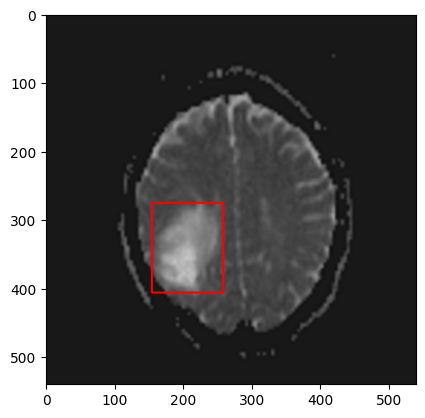

In [5]:
image = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\init_imgs\\T_991.jpg")
x, y, width, height = 0.383333, 0.632407, 0.192593, 0.242593

x_min = int((x - width / 2) * image.shape[1])
y_min = int((y - height / 2) * image.shape[0])
x_max = int((x + width / 2) * image.shape[1])
y_max = int((y + height / 2) * image.shape[0])

color = (255, 0, 0)  
thickness = 2  

cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)
plt.imshow(image)


# Testing The Reliability

### 2nd Quarter Test: ✅

In [ ]:
# image_init = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\init_imgs\\T_574.jpg")
# image_rotated = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out\\T_574_CCWR_.jpg")
# x, y, width, height = 0.336111, 0.397222, 0.164815, 0.153704


# def rotation_mapper(Alpha, Xi, Yi):
#     """Step 1"""
#     Initial_quarters = []
#     Landing_quarter = 0
#     Cx = Xi*540
#     Cy = Yi*540
#     # 4th Quarter
#     if Xi > 0.50 and Yi > 0.50: 
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}")
#         Xi = abs((Xi * 540) - 270)
#         Yi = abs((Yi*540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("4th Q\n")
#         Initial_quarters.append(4)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = 90 - math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 2nd Quarter 
#     elif Xi <= 0.50 and Yi <= 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}") 
#         Xi = abs(270 - (Xi * 540))
#         Yi = abs(270 - (Yi * 540))
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("2nd Q\n")
#         Initial_quarters.append(2)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = 90 - math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 1st Quarter
#     elif Yi <= 0.50 and Xi > 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}\n")
#         Yi = abs(270 - (Yi * 540))
#         Xi = abs((Xi * 540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("1st Q\n")
#         Initial_quarters.append(1)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 3rd Quarter 
#     elif Yi > 0.50 and Xi <= 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}\n")
#         Xi = abs(270 - (Xi * 540))
#         Yi = abs((Yi*540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("3rd Q\n")
#         Initial_quarters.append(3)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
    
#     # Step 4 
#     Vj = Vi
#     Temp_Theta = Theta * 180/3.14
#     """We need to check for the objects trajectory and determine its landing point"""
#     for index in Initial_quarters:
        
#         if (Temp_Theta < 90):
#             Landing_quarter = index
            
#         elif (90 < Temp_Theta < 180):
#             Landing_quarter = index +1
            
#         elif (180 < Temp_Theta < 270):
#             Landing_quarter = index +2 
            
#         elif (270 < Temp_Theta < 360):
#             Landing_quarter = index +3
    
#     if Landing_quarter > 4:
#         Landing_quarter -= 4
#     print(f"Landing Quarter: {Landing_quarter}\n")
        
#     # """Now we need to modify the x, y values with respect to their landing point"""
#     if Landing_quarter == 1:
#         Yj = 540 - (int(Vj * math.sin(Theta)) + 270)
#         print(f"Yj: {Yj}\n")
#         Xj = int(Vj * math.cos(Theta)) + 270
#         print(f"Xj: {Xj}\n")
        
#     elif Landing_quarter == 2:
#         Yj = 270 - int(Vj * math.cos(Theta))
#         print(f"Yj: {Yj}\n")
#         Xj = 270 - int(Vj * math.sin(Theta))
#         print(f"Xj: {Xj}\n")
    
#     elif Landing_quarter == 3:
#         Yj = int(Vj * math.sin(Theta)) + 270
#         print(f"Yj: {Yj}\n")
#         Xj = 270 - int(Vj * math.cos(Theta)) 
#         print(f"Xj: {Xj}\n")
        
#     elif Landing_quarter == 4:
#         Yj = 540 + int(Vj * math.sin(Theta)) - 270
#         print(f"Yj: {Yj}\n")
#         Xj = int(Vj * math.cos(Theta)) + 270
#         print(f"Xj: {Xj}\n")
        
    
#     # Step 5
#     distance_x = abs(int(Xj - Cx))
#     distance_y = abs(int(Yj - Cy))
    
#     return Xj, Yj, distance_x, distance_y 


# x, y, distance_x, distance_y = rotation_mapper(Alpha = 30, Xi = x, Yi = y)


# print(f"distance_x is : {distance_x}\n")
# print(f"distance_y is : {distance_y}\n")


# "final Center"
# cv2.circle(image_rotated, (x,y), radius=0, color=(0, 255, 0), thickness=12)
# "initial Center"
# cv2.circle(image_init, (181,214), radius=0, color=(255, 0, 0), thickness=12)

# fig = plt.figure(figsize=(10, 7))
# rows = 1
# columns = 2

# fig.add_subplot(rows, columns, 1) 
# plt.imshow(image_init)
# plt.title("Center in Original")
  

# fig.add_subplot(rows, columns, 2)
# plt.imshow(image_rotated)
# plt.title("Center in Rotated")

### 4th Quarter Test: ✅

In [ ]:
# image_init = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\init_imgs\\T_1316.jpg")
# image_rotated = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out\\T_1316_CCWR_.jpg")
# x, y, width, height = 0.405556, 0.675926, 0.159259, 0.337037


# def rotation_mapper(Alpha, Xi, Yi):
#     """Step 1"""
#     Initial_quarters = []
#     Landing_quarter = 0
#     Cx = Xi*540
#     Cy = Yi*540
#     # 4th Quarter
#     if Xi > 0.50 and Yi > 0.50: 
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}")
#         Xi = abs((Xi * 540) - 270)
#         Yi = abs((Yi*540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("4th Q\n")
#         Initial_quarters.append(4)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = 90 - math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 2nd Quarter 
#     elif Xi <= 0.50 and Yi <= 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}") 
#         Xi = abs(270 - (Xi * 540))
#         Yi = abs(270 - (Yi * 540))
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("2nd Q\n")
#         Initial_quarters.append(2)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = 90 - math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 1st Quarter
#     elif Yi <= 0.50 and Xi > 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}\n")
#         Yi = abs(270 - (Yi * 540))
#         Xi = abs((Xi * 540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("1st Q\n")
#         Initial_quarters.append(1)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 3rd Quarter 
#     elif Yi > 0.50 and Xi <= 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}\n")
#         Xi = abs(270 - (Xi * 540))
#         Yi = abs((Yi*540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("3rd Q\n")
#         Initial_quarters.append(3)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
    
#     # Step 4 
#     Vj = Vi
#     Temp_Theta = Theta * 180/3.14
#     """We need to check for the objects trajectory and determine its landing point"""
#     for index in Initial_quarters:
        
#         if (Temp_Theta < 90):
#             Landing_quarter = index
            
#         elif (90 < Temp_Theta < 180):
#             Landing_quarter = index +1
            
#         elif (180 < Temp_Theta < 270):
#             Landing_quarter = index +2 
            
#         elif (270 < Temp_Theta < 360):
#             Landing_quarter = index +3
    
#     if Landing_quarter > 4:
#         Landing_quarter -= 4
#     print(f"Landing Quarter: {Landing_quarter}\n")
        
#     # """Now we need to modify the x, y values with respect to their landing point"""
#     if Landing_quarter == 1:
#         Yj = 540 - (int(Vj * math.sin(Theta)) + 270)
#         print(f"Yj: {Yj}\n")
#         Xj = int(Vj * math.cos(Theta)) + 270
#         print(f"Xj: {Xj}\n")
        
#     elif Landing_quarter == 2:
#         Yj = 270 - int(Vj * math.cos(Theta))
#         print(f"Yj: {Yj}\n")
#         Xj = 270 - int(Vj * math.sin(Theta))
#         print(f"Xj: {Xj}\n")
    
#     elif Landing_quarter == 3:
#         Yj = int(Vj * math.sin(Theta)) + 270
#         print(f"Yj: {Yj}\n")
#         Xj = 270 - int(Vj * math.cos(Theta)) 
#         print(f"Xj: {Xj}\n")
        
#     elif Landing_quarter == 4:
#         Yj = 540 + int(Vj * math.sin(Theta)) - 270
#         print(f"Yj: {Yj}\n")
#         Xj = int(Vj * math.cos(Theta)) + 270
#         print(f"Xj: {Xj}\n")
        
    
#     # Step 5
#     distance_x = abs(int(Xj - Cx))
#     distance_y = abs(int(Yj - Cy))
    
#     return Xj, Yj, distance_x, distance_y 


# x, y, distance_x, distance_y = rotation_mapper(Alpha = 30, Xi = x, Yi = y)


# print(f"distance_x is : {distance_x}\n")
# print(f"distance_y is : {distance_y}\n")


# "final Center"
# cv2.circle(image_rotated, (x,y), radius=0, color=(0, 255, 0), thickness=12)
# "initial Center"
# cv2.circle(image_init, (219,365), radius=0, color=(255, 0, 0), thickness=12)

# fig = plt.figure(figsize=(10, 7))
# rows = 1
# columns = 2

# fig.add_subplot(rows, columns, 1) 
# plt.imshow(image_init)
# plt.title("Center in Original")
  

# fig.add_subplot(rows, columns, 2)
# plt.imshow(image_rotated)
# plt.title("Center in Rotated")


### 3rd Quarter Test: ✅

In [ ]:
# image_init = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\init_imgs\\T_991.jpg")
# image_rotated = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out\\T_991_CCWR_.jpg")
# x, y, width, height = 0.383333, 0.632407, 0.192593, 0.242593


# def rotation_mapper(Alpha, Xi, Yi):
#     """Step 1"""
#     Initial_quarters = []
#     Landing_quarter = 0
#     Cx = Xi*540
#     Cy = Yi*540
#     # 4th Quarter
#     if Xi > 0.50 and Yi > 0.50: 
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}")
#         Xi = abs((Xi * 540) - 270)
#         Yi = abs((Yi*540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("4th Q\n")
#         Initial_quarters.append(4)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = 90 - math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 2nd Quarter 
#     elif Xi <= 0.50 and Yi <= 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}") 
#         Xi = abs(270 - (Xi * 540))
#         Yi = abs(270 - (Yi * 540))
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("2nd Q\n")
#         Initial_quarters.append(2)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = 90 - math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 1st Quarter
#     elif Yi <= 0.50 and Xi > 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}\n")
#         Yi = abs(270 - (Yi * 540))
#         Xi = abs((Xi * 540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("1st Q\n")
#         Initial_quarters.append(1)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 3rd Quarter 
#     elif Yi > 0.50 and Xi <= 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}\n")
#         Xi = abs(270 - (Xi * 540))
#         Yi = abs((Yi*540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("3rd Q\n")
#         Initial_quarters.append(3)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
    
#     # Step 4 
#     Vj = Vi
#     Temp_Theta = Theta * 180/3.14
#     """We need to check for the objects trajectory and determine its landing point"""
#     for index in Initial_quarters:
        
#         if (Temp_Theta < 90):
#             Landing_quarter = index
            
#         elif (90 < Temp_Theta < 180):
#             Landing_quarter = index +1
            
#         elif (180 < Temp_Theta < 270):
#             Landing_quarter = index +2 
            
#         elif (270 < Temp_Theta < 360):
#             Landing_quarter = index +3
    
#     if Landing_quarter > 4:
#         Landing_quarter -= 4
#     print(f"Landing Quarter: {Landing_quarter}\n")
        
#     # """Now we need to modify the x, y values with respect to their landing point"""
#     if Landing_quarter == 1:
#         Yj = 540 - (int(Vj * math.sin(Theta)) + 270)
#         print(f"Yj: {Yj}\n")
#         Xj = int(Vj * math.cos(Theta)) + 270
#         print(f"Xj: {Xj}\n")
        
#     elif Landing_quarter == 2:
#         Yj = 270 - int(Vj * math.cos(Theta))
#         print(f"Yj: {Yj}\n")
#         Xj = 270 - int(Vj * math.sin(Theta))
#         print(f"Xj: {Xj}\n")
    
#     elif Landing_quarter == 3:
#         Yj = int(Vj * math.sin(Theta)) + 270
#         print(f"Yj: {Yj}\n")
#         Xj = 270 - int(Vj * math.cos(Theta)) 
#         print(f"Xj: {Xj}\n")
        
#     elif Landing_quarter == 4:
#         Yj = 540 + int(Vj * math.sin(Theta)) - 270
#         print(f"Yj: {Yj}\n")
#         Xj = int(Vj * math.cos(Theta)) + 270
#         print(f"Xj: {Xj}\n")
        
    
#     # Step 5
#     distance_x = abs(int(Xj - Cx))
#     distance_y = abs(int(Yj - Cy))
    
#     return Xj, Yj, distance_x, distance_y 


# x, y, distance_x, distance_y = rotation_mapper(Alpha = 30, Xi = x, Yi = y)


# print(f"distance_x is : {distance_x}\n")
# print(f"distance_y is : {distance_y}\n")


# "final Center"
# cv2.circle(image_rotated, (x,y), radius=0, color=(0, 255, 0), thickness=12)
# "initial Center"
# cv2.circle(image_init, (206,341), radius=0, color=(255, 0, 0), thickness=12)

# fig = plt.figure(figsize=(10, 7))
# rows = 1
# columns = 2

# fig.add_subplot(rows, columns, 1) 
# plt.imshow(image_init)
# plt.title("Center in Original")
  

# fig.add_subplot(rows, columns, 2)
# plt.imshow(image_rotated)
# plt.title("Center in Rotated")


### 1st Quarter Test: ✅

In [ ]:
# image_init = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\init_imgs\\T_740.jpg")
# image_rotated = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out\\T_740_CCWR_.jpg")
# x, y, width, height = 0.602778, 0.423148, 0.135185, 0.179630


# def rotation_mapper(Alpha, Xi, Yi):
#     """Step 1"""
#     Initial_quarters = []
#     Landing_quarter = 0
#     Cx = Xi*540
#     Cy = Yi*540
#     # 4th Quarter
#     if Xi > 0.50 and Yi > 0.50: 
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}")
#         Xi = abs((Xi * 540) - 270)
#         Yi = abs((Yi*540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("4th Q\n")
#         Initial_quarters.append(4)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = 90 - math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 2nd Quarter 
#     elif Xi <= 0.50 and Yi <= 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}") 
#         Xi = abs(270 - (Xi * 540))
#         Yi = abs(270 - (Yi * 540))
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("2nd Q\n")
#         Initial_quarters.append(2)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = 90 - math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 1st Quarter
#     elif Yi <= 0.50 and Xi > 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}\n")
#         Yi = abs(270 - (Yi * 540))
#         Xi = abs((Xi * 540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("1st Q\n")
#         Initial_quarters.append(1)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
#     # 3rd Quarter 
#     elif Yi > 0.50 and Xi <= 0.50:
#         print(f"Cx: {Xi*540}, Cy: {Yi*540}\n")
#         Xi = abs(270 - (Xi * 540))
#         Yi = abs((Yi*540) - 270)
#         # Step 2
#         Vi = math.sqrt((Xi) * (Xi) + (Yi) * (Yi))
#         print(f"Vi : {Vi}\n")
#         print("3rd Q\n")
#         Initial_quarters.append(3)
#         # Step 3
#         Beta = math.asin(Yi / Vi)
#         Beta = math.degrees(Beta)
#         print(f"Beta: {Beta}\n")
#         Theta = Alpha + Beta
#         print(f"Theta: {Theta}\n")
#         Theta = Theta * 3.141592 / 180
    
    
#     # Step 4 
#     Vj = Vi
#     Temp_Theta = Theta * 180/3.14
#     """We need to check for the objects trajectory and determine its landing point"""
#     for index in Initial_quarters:
        
#         if (Temp_Theta < 90):
#             Landing_quarter = index
            
#         elif (90 < Temp_Theta < 180):
#             Landing_quarter = index +1
            
#         elif (180 < Temp_Theta < 270):
#             Landing_quarter = index +2 
            
#         elif (270 < Temp_Theta < 360):
#             Landing_quarter = index +3
    
#     if Landing_quarter > 4:
#         Landing_quarter -= 4
#     print(f"Landing Quarter: {Landing_quarter}\n")
        
#     # """Now we need to modify the x, y values with respect to their landing point"""
#     if Landing_quarter == 1:
#         Yj = 540 - (int(Vj * math.sin(Theta)) + 270)
#         print(f"Yj: {Yj}\n")
#         Xj = int(Vj * math.cos(Theta)) + 270
#         print(f"Xj: {Xj}\n")
        
#     elif Landing_quarter == 2:
#         Yj = 270 - int(Vj * math.cos(Theta))
#         print(f"Yj: {Yj}\n")
#         Xj = 270 - int(Vj * math.sin(Theta))
#         print(f"Xj: {Xj}\n")
    
#     elif Landing_quarter == 3:
#         Yj = int(Vj * math.sin(Theta)) + 270
#         print(f"Yj: {Yj}\n")
#         Xj = 270 - int(Vj * math.cos(Theta)) 
#         print(f"Xj: {Xj}\n")
        
#     elif Landing_quarter == 4:
#         Yj = 540 + int(Vj * math.sin(Theta)) - 270
#         print(f"Yj: {Yj}\n")
#         Xj = int(Vj * math.cos(Theta)) + 270
#         print(f"Xj: {Xj}\n")
        
    
#     # Step 5
#     distance_x = abs(int(Xj - Cx))
#     distance_y = abs(int(Yj - Cy))
    
#     return Xj, Yj, distance_x, distance_y 


# x, y, distance_x, distance_y = rotation_mapper(Alpha = 30, Xi = x, Yi = y)


# print(f"distance_x is : {distance_x}\n")
# print(f"distance_y is : {distance_y}\n")


# "final Center"
# cv2.circle(image_rotated, (x,y), radius=0, color=(0, 255, 0), thickness=12)
# "initial Center"
# cv2.circle(image_init, (325,228), radius=0, color=(255, 0, 0), thickness=12)

# fig = plt.figure(figsize=(10, 7))
# rows = 1
# columns = 2

# fig.add_subplot(rows, columns, 1) 
# plt.imshow(image_init)
# plt.title("Center in Original")
  

# fig.add_subplot(rows, columns, 2)
# plt.imshow(image_rotated)
# plt.title("Center in Rotated")


## More Efficient Way ...

Rotating Points around an Arbitrary Center
But what if we want to rotate our point around something other than the origin? We simply modify equation 1 and 2 as follows:
- x1 = (x0 – xc)cos(θ) – (y0 – yc)sin(θ) + xc(Equation 3)
- y1 = (x0 – xc)sin(θ) + (y0 – yc)cos(θ) + yc(Equation 4)

where:


- (x0, y0)	= Point to be rotated
- (xc, yc)	= Coordinates of center of rotation
- θ	= Angle of rotation (positive counterclockwise)
- (x1, y1)	= Coordinates of point after rotation
- Note that if (xc, yc) = (0, 0), then equations 3 and 4 simplify to become equations 1 and 2, which is what we expect.

Source : https://danceswithcode.net/engineeringnotes/rotations_in_2d/rotations_in_2d.html  
@Shervin

In [ ]:
# Test
image_init = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\init_imgs\\T_574.jpg")
image_rotated = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out\\T_574_CCWR_.jpg")
X, Y, width, height = 0.336111, 0.397222, 0.164815, 0.153704

center = np.array([270,270])
cordinate_in_global = (np.array([X,Y]) * 540).astype(int)

def rotation_mapper(alpha, Xi, Yi):
    """Step 1"""
    Xi = int(Xi * 540 - 270)
    Yi = int(Yi * 540 - 270)
    print(f"Xi: {Xi}, Yi: {Yi}")
    
    "Step 2"
    alpha = math.radians(alpha)
    Xj = int(Xi*math.cos(alpha) - Yi*math.sin(alpha))
    Yj = int(Xi*math.sin(alpha) + Yi*math.cos(alpha))
    print(f"In center of image : Xj: {Xj}, Yj: {Yj}")
    Xj += 270
    Yj += 270
    print(f"In OpenCv cordinates : Xj: {Xj+270}, Yj: {Yj+270}")
    return Xj, Yj


x, y = rotation_mapper(alpha = -30, Xi = X, Yi = Y)

distance_x = abs(x - X*540)
print(f"Movement of X : {distance_x}")
distance_y = abs(y - Y*540)
print(f"Movement of Y : {distance_y}")

"final Center"
cv2.circle(image_rotated, (x,y), radius=0, color=(0, 255, 0), thickness=12)
"initial Center"
cv2.circle(image_init, cordinate_in_global, radius=0, color=(255, 0, 0), thickness=12)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1) 
plt.imshow(image_init)
plt.title("Center in Original")
  

fig.add_subplot(rows, columns, 2)
plt.imshow(image_rotated)
plt.title("Center in Rotated")

# Flip Augmentation

Text(0.5, 1.0, 'Center in H Flipped')

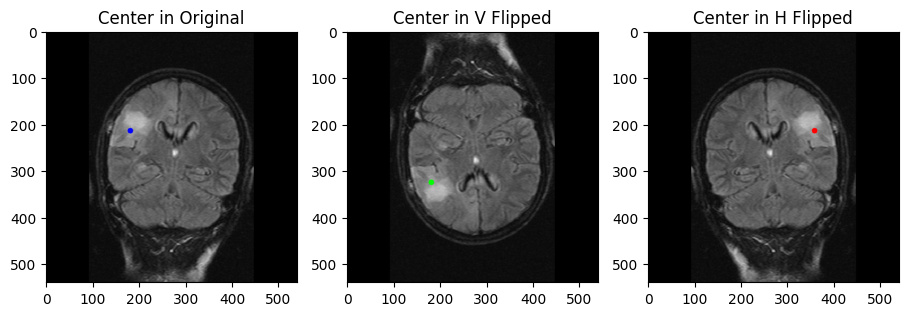

In [29]:
image_init = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\init_imgs\\T_574.jpg")
image_flipped_h = cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out\\T_574_HF_.jpg")
image_flipped_v= cv2.imread("C:\\Users\\Eurus\\Desktop\\TestingImagesAugmentation\\out\\T_574_VF_.jpg")

X, Y, width, height = 0.336111, 0.397222, 0.164815, 0.153704

center = np.array([270,270])
cordinate_in_global = (np.array([X,Y]) * 540).astype(int)

def flip_mapper(vertical_key, horizontal_key, Xi, Yi):
    
    if horizontal_key == True:
        Xj = 540 - (540 * Xi)
        Yj = 540 * Yi
    elif vertical_key == True:
        Xj = 540 * Xi
        Yj = 540 - (540 * Yi)
    else:
        print("Error!: Nothing to flip ...")
        
    return int(Xj), int(Yj)
        

x1, y1 = flip_mapper(vertical_key=True, horizontal_key=False, Xi = X, Yi = Y)
x2, y2 = flip_mapper(vertical_key=False, horizontal_key=True, Xi = X, Yi = Y)


"initial Center"
cv2.circle(image_init, cordinate_in_global, radius=0, color=(0, 0, 255), thickness=12)
"vertical flip Center"
cv2.circle(image_flipped_v, (x1,y1), radius=0, color=(0, 255, 0), thickness=12)
"horizontal flip Center"
cv2.circle(image_flipped_h, (x2,y2), radius=0, color=(255, 0, 0), thickness=12)



fig = plt.figure(figsize=(11, 9))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1) 
plt.imshow(image_init)
plt.title("Center in Original")
  
fig.add_subplot(rows, columns, 2)
plt.imshow(image_flipped_v)
plt.title("Center in V Flipped")
    
fig.add_subplot(rows, columns, 3)
plt.imshow(image_flipped_h)
plt.title("Center in H Flipped")

